# K-means clustering

## import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [3]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

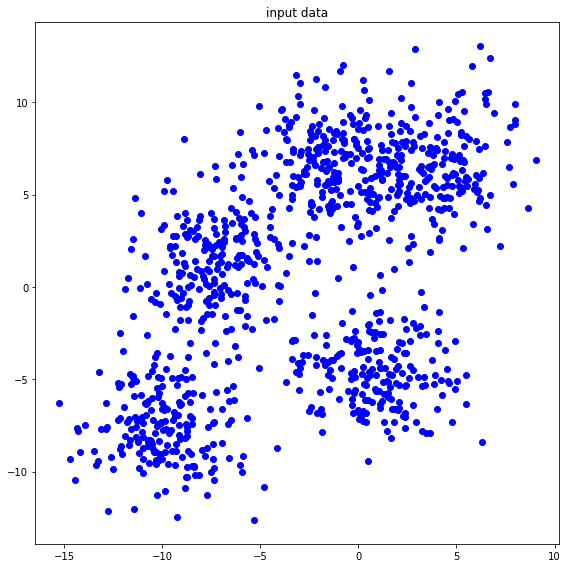

In [4]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y, 'o', color = 'blue')
plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [5]:
def compute_distance(feature, center):
    distance = np.zeros(feature.shape[0])
    
    for i in range(feature.shape[0]):
        distance[i] = np.sum(np.square(feature[i] - center))
    
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [25]:
def compute_centroid(feature, label_feature, value_label, center):
    centroid = np.array((0.0, 0.0))
    counter = 0
    
    for i in range(label_feature.shape[0]):
        if value_label == label_feature[i]:
            centroid += feature[i]
            counter += 1
    
    if counter != 0:
        centroid = centroid / counter
    else:
        centroid = center

    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [26]:
def compute_label(distance):
    index_label_feature = np.zeros(number_data)
    
    for i in range(distance.shape[0]):
        minIndex = 0
        minLabel = distance[i][minIndex]
        
        for j in range(distance.shape[1]):
            if distance[i][j] < minLabel:
                minIndex = j
                minLabel = distance[i][j]
        
        index_label_feature[i] = minIndex
        
    return index_label_feature

In [27]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 20
# ===================================================

In [28]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

label_cluster = np.array(((-2.0, -1.0), (-5.0, -4.2), (-0.2, 1.0), (2.5, 2.8), (1.0, 6.5)))
if number_cluster == 10:
    label_cluster = np.append(label_cluster, ((-10.0, -7.5), (0.0, -5.3), (2.0, -4.0), (-2.5, 6.0), (4.5, 5.0)), axis = 0)

for i in range(number_iteration):
    
    for k in range(distance.shape[1]):
        distance[:, k] = compute_distance(feature, label_cluster[k])
        
    label_feature = compute_label(distance)
    centroid = label_cluster
    centroid_iteration[i] = centroid
    
    loss_sum = 0
    for k in range(len(label_cluster)):
        centroid[k] = compute_centroid(feature, label_feature, k, centroid[k])
        
        for j in range(label_feature.shape[0]):
            # calculation of loss
            if label_feature[j] == k:
                temp = feature[j] - centroid[k]
                loss_temp = np.sum(np.square(temp))
                loss_sum += loss_temp
                
    label_cluster = centroid
    
    loss = loss_sum / feature.shape[0]
    loss_iteration[i] = loss

## plot the results

In [29]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    
    plt.plot(x, y, 'o', color = 'blue')
    
    plt.tight_layout()
    plt.show()

In [30]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
   
    index = np.arange(number_iteration)
    plt.plot(index, loss_iteration, '-', color = 'red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [31]:

def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    plt.scatter(centroid_iteration[0, :, 0], centroid_iteration[0, :, 1], color = 'blue', label = 'initail')
    
    if centroid_iteration.shape[1] == 5:
        plt.plot(centroid_iteration[:, 0, 0], centroid_iteration[:, 0, 1], '-', color = 'red', label = 'cluster=0')
        plt.plot(centroid_iteration[:, 1, 0], centroid_iteration[:, 1, 1], '-', color = 'blue', label = 'cluster=1')
        plt.plot(centroid_iteration[:, 2, 0], centroid_iteration[:, 2, 1], '-', color = 'orange', label = 'cluster=2')
        plt.plot(centroid_iteration[:, 3, 0], centroid_iteration[:, 3, 1], '-', color = 'green', label = 'cluster=3')
        plt.plot(centroid_iteration[:, 4, 0], centroid_iteration[:, 4, 1], '-', color = 'pink', label = 'cluster=4')
    elif centroid_iteration.shape[1] == 10:
        plt.plot(centroid_iteration[:, 0, 0], centroid_iteration[:, 0, 1], '-', color = 'red', label = 'cluster=0')
        plt.plot(centroid_iteration[:, 1, 0], centroid_iteration[:, 1, 1], '-', color = 'blue', label = 'cluster=1')
        plt.plot(centroid_iteration[:, 2, 0], centroid_iteration[:, 2, 1], '-', color = 'orange', label = 'cluster=2')
        plt.plot(centroid_iteration[:, 3, 0], centroid_iteration[:, 3, 1], '-', color = 'green', label = 'cluster=3')
        plt.plot(centroid_iteration[:, 4, 0], centroid_iteration[:, 4, 1], '-', color = 'pink', label = 'cluster=4')
        plt.plot(centroid_iteration[:, 5, 0], centroid_iteration[:, 5, 1], '-', color = 'yellow', label = 'cluster=5')
        plt.plot(centroid_iteration[:, 6, 0], centroid_iteration[:, 6, 1], '-', color = 'gray', label = 'cluster=6')
        plt.plot(centroid_iteration[:, 7, 0], centroid_iteration[:, 7, 1], '-', color = 'tomato', label = 'cluster=7')
        plt.plot(centroid_iteration[:, 8, 0], centroid_iteration[:, 8, 1], '-', color = 'magenta', label = 'cluster=8')
        plt.plot(centroid_iteration[:, 9, 0], centroid_iteration[:, 9, 1], '-', color = 'turquoise', label = 'cluster=9')
    
    plt.scatter(centroid_iteration[centroid_iteration.shape[0] - 1, :, 0], centroid_iteration[centroid_iteration.shape[0] - 1, :, 1], marker = 's', color = 'red', label = 'final')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [40]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    
    if label_cluster.shape[0] == 5:
        plt.scatter(feature[:, 0], feature[:, 1], c = label_feature, cmap = plt.cm.get_cmap('rainbow', label_cluster.shape[0]))
        plt.colorbar(ticks = range(label_cluster.shape[0]), format = '%d', boundaries = [0, 1, 2, 3, 4, 5], values = [0, 1, 2, 3, 4], label = 'cluster')
    elif label_cluster.shape[0] == 10:
        plt.scatter(feature[:, 0], feature[:, 1], c = label_feature, cmap = plt.cm.get_cmap('rainbow', label_cluster.shape[0]))
        plt.colorbar(ticks = range(label_cluster.shape[0]), format = '%d', boundaries = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], label = 'cluster')
    
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

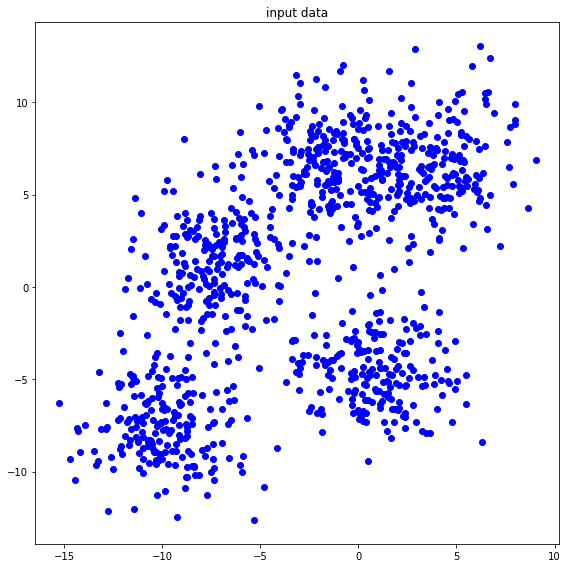

In [32]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

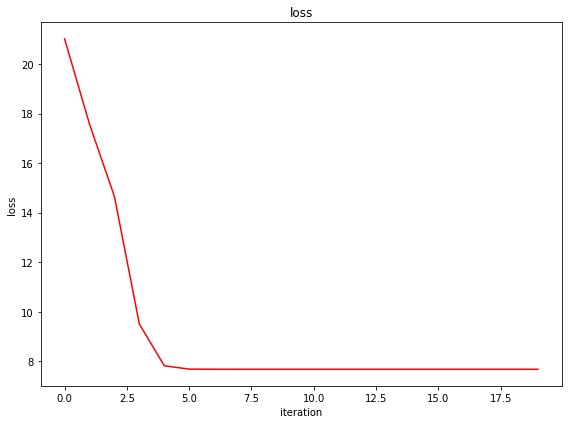

In [33]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

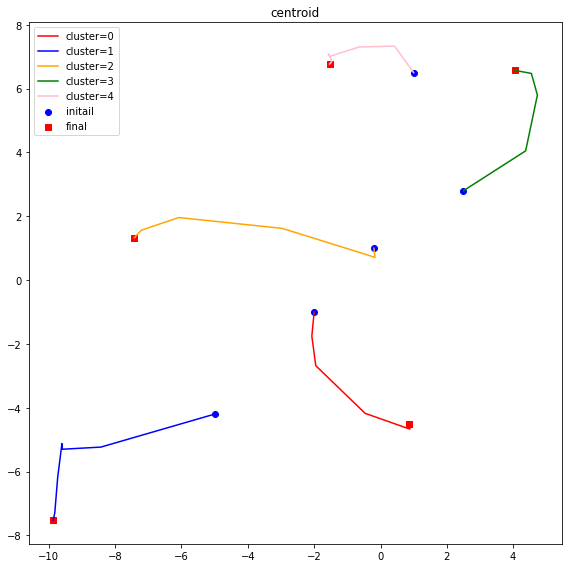

In [34]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

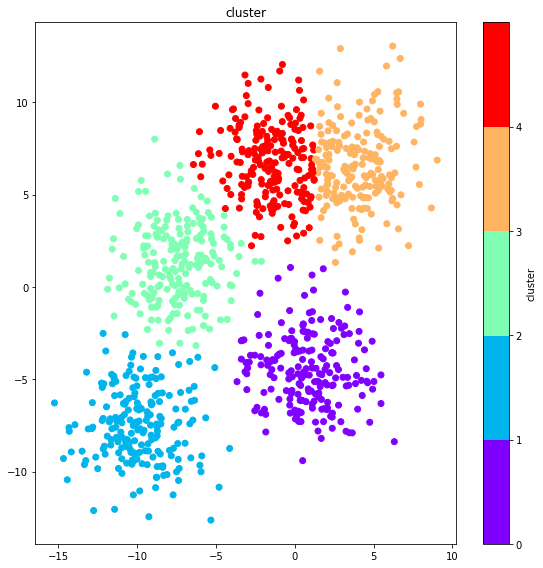

In [41]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

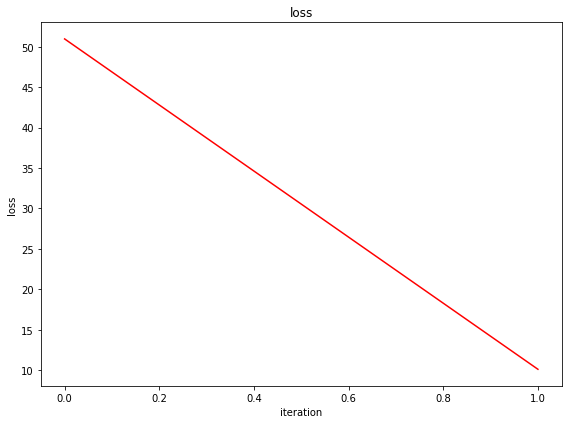

In [97]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

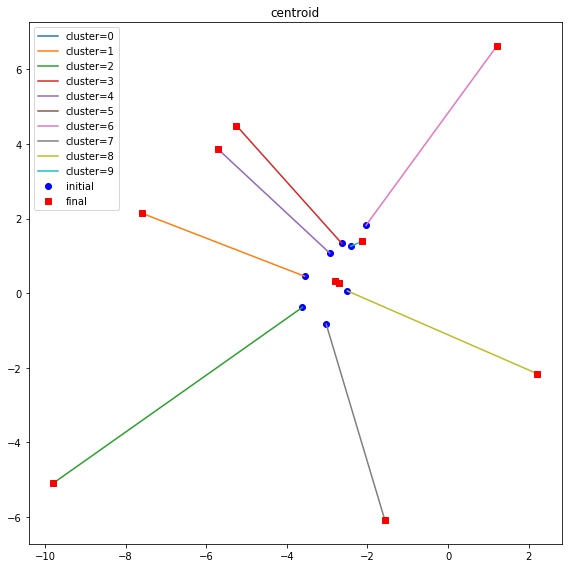

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

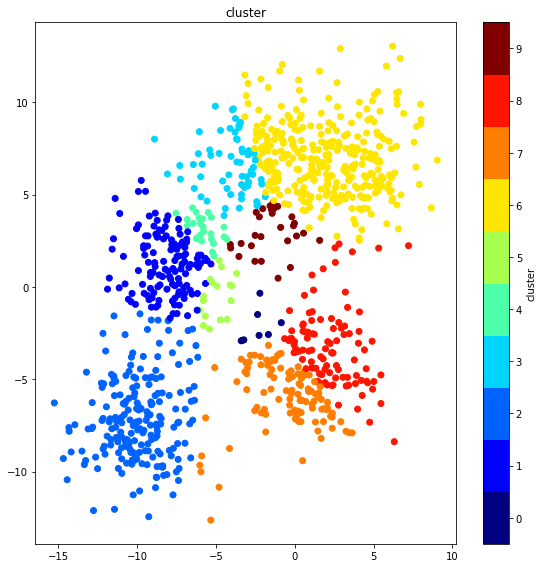

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***